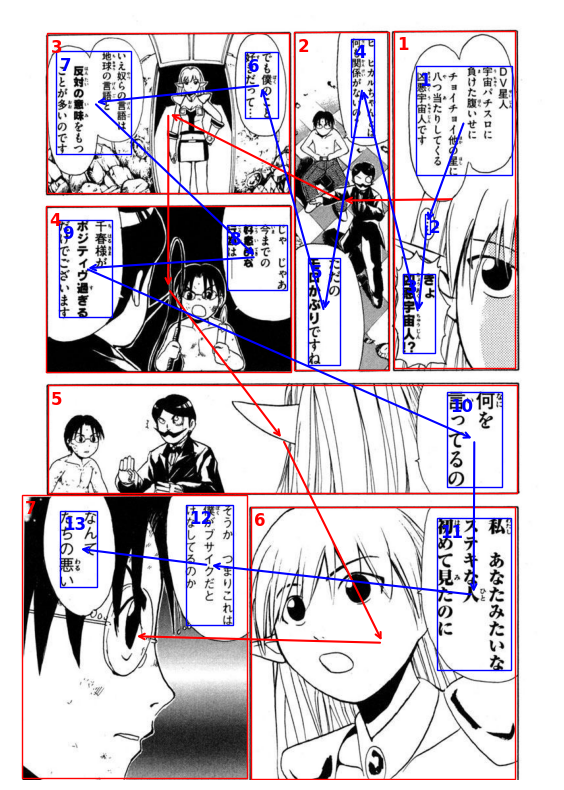

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def display_sorted_annotations(manga_page_path, sorted_panel_file, sorted_textbox_file):
    img = cv2.imread(manga_page_path)

    if img is None:
        print(f"Error loading image: {manga_page_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # read sorted panel annotations
    panels = []
    panel_centers = []
    with open(sorted_panel_file, 'r') as panel_file:
        for line in panel_file.readlines():
            data = line.strip().split()
            class_id = int(data[0])
            x_center = float(data[1])
            y_center = float(data[2])
            bbox_width = float(data[3])
            bbox_height = float(data[4])
            x_min = int((x_center - bbox_width / 2) * img.shape[1])
            y_min = int((y_center - bbox_height / 2) * img.shape[0])
            x_max = int((x_center + bbox_width / 2) * img.shape[1])
            y_max = int((y_center + bbox_height / 2) * img.shape[0])
            panels.append((x_min, y_min, x_max, y_max))
            panel_centers.append((int(x_center * img.shape[1]), int(y_center * img.shape[0])))

    # read sorted textbox annotations
    text_boxes = []
    textbox_centers = []
    with open(sorted_textbox_file, 'r') as textbox_file:
        for line in textbox_file.readlines():
            data = line.strip().split()
            class_id = int(data[0])
            x_center = float(data[1])
            y_center = float(data[2])
            bbox_width = float(data[3])
            bbox_height = float(data[4])
            x_min = int((x_center - bbox_width / 2) * img.shape[1])
            y_min = int((y_center - bbox_height / 2) * img.shape[0])
            x_max = int((x_center + bbox_width / 2) * img.shape[1])
            y_max = int((y_center + bbox_height / 2) * img.shape[0])
            text_boxes.append((x_min, y_min, x_max, y_max))
            textbox_centers.append((int(x_center * img.shape[1]), int(y_center * img.shape[0])))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)

    # draw panels (sorted positions)
    for i, (x_min, y_min, x_max, y_max) in enumerate(panels):
        color = 'red'
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min + 5, y_min + 30, str(i + 1), color=color, fontsize=12, fontweight='bold') 

    # draw directed lines (panels)
    for i in range(len(panel_centers) - 1):
        start = panel_centers[i]
        end = panel_centers[i + 1]
        ax.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data',
                    arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

    # draw text boxes (sorted positions)
    for i, (x_min, y_min, x_max, y_max) in enumerate(text_boxes):
        color = 'blue'
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min + 5, y_min + 30, str(i + 1), color=color, fontsize=12, fontweight='bold') 

    # draw directed lines (text boxes)
    for i in range(len(textbox_centers) - 1):
        start = textbox_centers[i]
        end = textbox_centers[i + 1]
        ax.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data',
                    arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))

    plt.axis('off') 
    plt.show()

manga_file_name = 'LancelotFullThrottle_036_left'

detected_panels_folder = "C:/Users/Zed/Desktop/CCNY Classes/2024 FALL/CSC 59867 Senior Project II/Project/Senior-Design/detected_panels/"
manga_page_path = os.path.join(detected_panels_folder, f'{manga_file_name}.jpg')
sorted_panel_file = os.path.join(detected_panels_folder, "./annotation_sorted_panel.txt")
sorted_textbox_file = os.path.join(detected_panels_folder, "./annotation_sorted_textboxes.txt")

display_sorted_annotations(manga_page_path, sorted_panel_file, sorted_textbox_file)
